In [2]:
!pip install psycopg2

^C


In [8]:
import psycopg2
from sqlalchemy import create_engine

In [9]:
engine = create_engine('postgresql+psycopg2://postgres:2458Tck@@localhost/SQL_db')

In [10]:
conn = engine.connect()

In [11]:
import pandas as pd

Create a histogram to visualize the most common salary ranges for employees.
Create a bar chart of average salary by title.

In [12]:
df = pd.read_sql("select * from department", conn)

In [13]:
df

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [14]:
salary_df = pd.read_sql("select * from salaries", conn)

In [15]:
salary_df


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [17]:
salary_df.max()

emp_no    499999
salary    129492
dtype: int64

In [18]:
Bins = [0,40000,60000,80000,100000,120000]
groups = ['<$40000','$40000 - $60000','$60000 - $80000','$80000 - $100000','$100000 - $129492']

In [19]:
salary_df["salary_ranges"] = pd.cut(salary_df["salary"],Bins, labels=groups)

In [20]:
new_salary = pd.DataFrame(salary_df.groupby("salary_ranges")['emp_no'].count())
new_salary

,emp_no
salary_ranges,
<$40000,95346
$40000 - $60000,121043
$60000 - $80000,66219
$80000 - $100000,16129
$100000 - $129492,1263


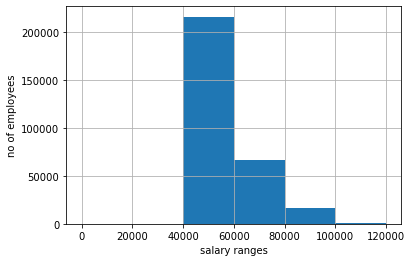

<Figure size 432x288 with 0 Axes>

In [32]:
hist = salary_df['salary'].hist(bins=Bins)
plt.xlabel("salary ranges")
plt.ylabel("no of employees")
plt.show()
plt.savefig("common salary range")

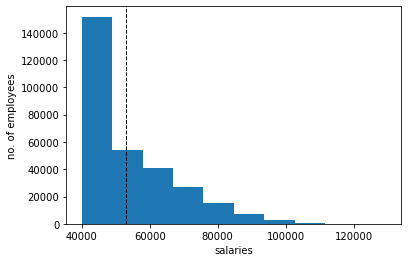

<Figure size 432x288 with 0 Axes>

In [31]:
plt.hist(salary_df['salary'])
plt.axvline(salary_df['salary'].mean(), color='k', linestyle='dashed', linewidth=1, label="Salary Mean")
plt.xlabel("salaries")
plt.ylabel("no. of employees")
plt.show()
plt.savefig("most common salary range")

In [23]:
import matplotlib.pyplot as plt

In [24]:
#Create a bar chart of average salary by title.

In [25]:
title_salary = pd.read_sql("select * from salaries join employees on salaries.emp_no = employees.emp_no join title on title.title_id = employees.title_id", conn)

In [26]:
grouped_title = pd.DataFrame(title_salary.groupby("title")['salary'].mean())
grouped_title

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


In [27]:
grouped_title.keys()

Index(['salary'], dtype='object')

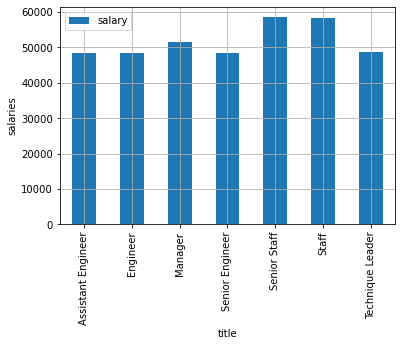

<Figure size 432x288 with 0 Axes>

In [33]:
grouped_title.plot(kind='bar')
plt.ylabel("salaries")
plt.grid()
plt.show()
plt.savefig("averag salary by title")